In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Mojtabaei/Downloads/Salary_Data.csv')
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


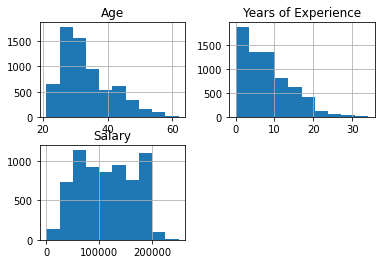

In [3]:
cdf = df[['Age', 'Years of Experience', 'Salary']]
cdf.hist()
plt.show()

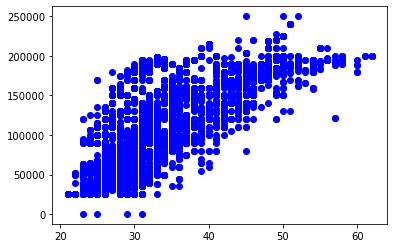

In [7]:
plt.scatter(cdf.Age, cdf.Salary, color='blue')
plt.show()

In [11]:
x = cdf['Years of Experience']

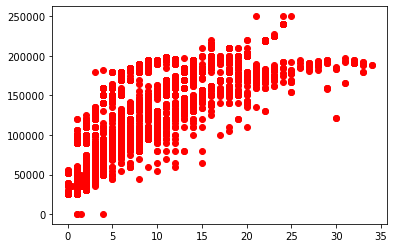

In [12]:
plt.scatter(x, cdf.Salary, color = 'red')
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## To clear our dataset from NAN values

In [32]:
def clean_dataset(train):
    assert isinstance(train, pd.DataFrame), "cdf needs to be a pd.DataFrame"
    train.dropna(inplace=True)
    indices_to_keep = ~train.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return train[indices_to_keep].astype(np.float64)

clean_dataset(train)

<ipython-input-32-35b554f3bbb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6698,37.0,6.0,75000.0
6699,49.0,20.0,200000.0
6700,32.0,3.0,50000.0
6701,30.0,4.0,55000.0


In [37]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Years of Experience']])
train_y = np.asanyarray(train['Salary'])
regr.fit(train_x, train_y)
print('Coefficienr: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficienr:  [7065.41461642]
intercept:  57743.18303000753


In [49]:
x = train['Years of Experience']
y = train['Salary']

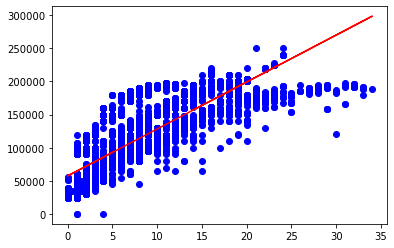

In [50]:
plt.scatter(x, y, color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r-')
plt.show()

In [58]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Years of Experience']])
test_y = np.asanyarray(test['Salary'])
test_y_ = regr.predict(test_x)
print('r2 score is: %.2f' % r2_score(test_y, test_y_))

r2 score is: 0.62
